c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

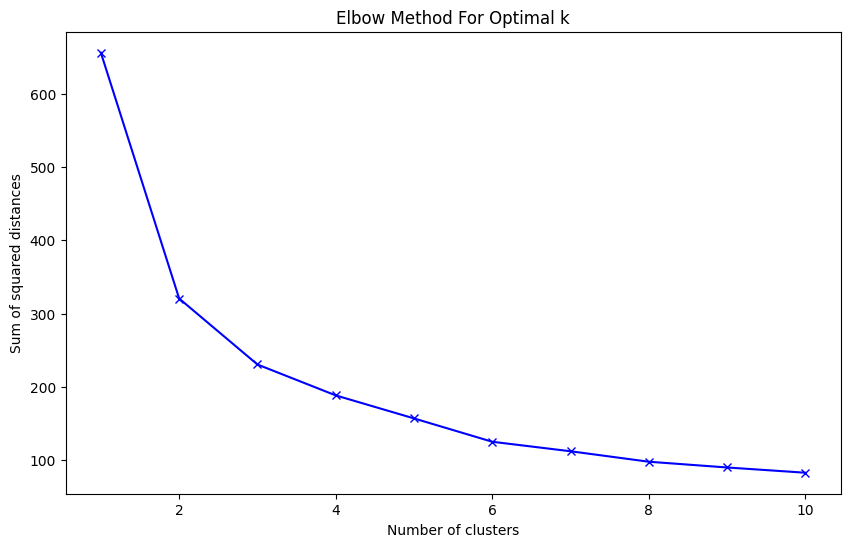

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


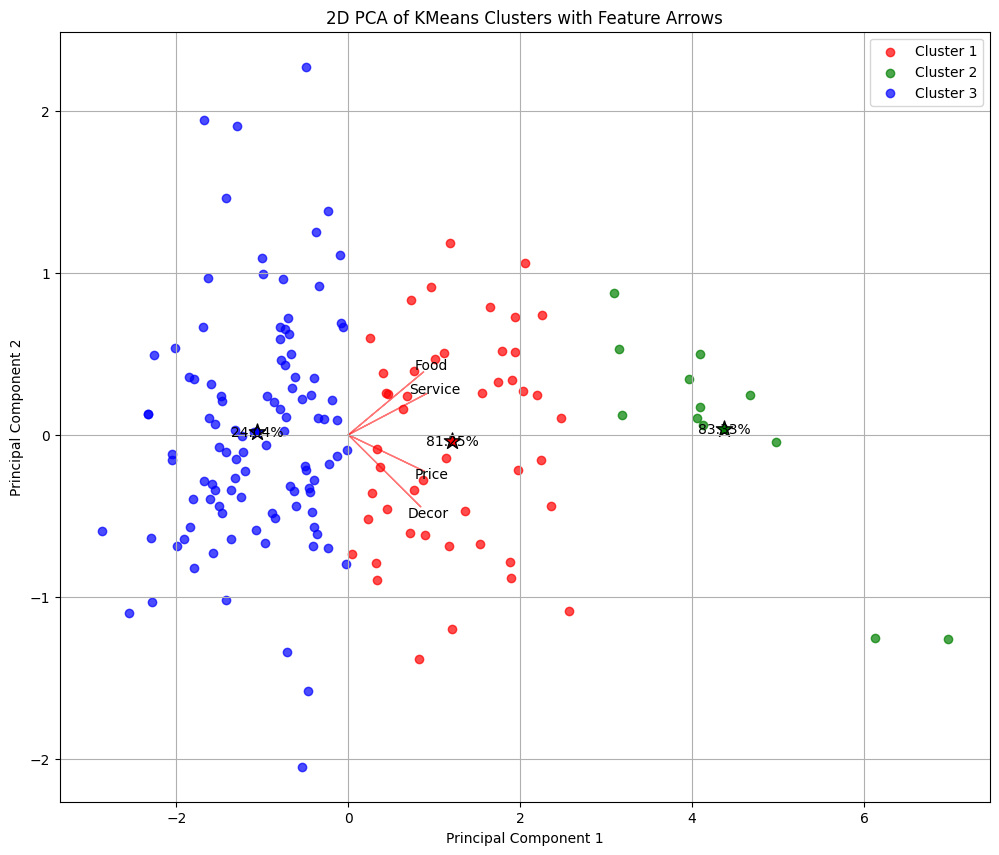

Cluster Summary Statistics:
          InMichelin       Food      Decor    Service       Price
Cluster                                                         
0          0.812500  23.062500  22.187500  21.666667   58.104167
1          0.833333  27.166667  26.083333  27.000000  105.750000
2          0.240385  19.721154  16.971154  17.951923   39.980769


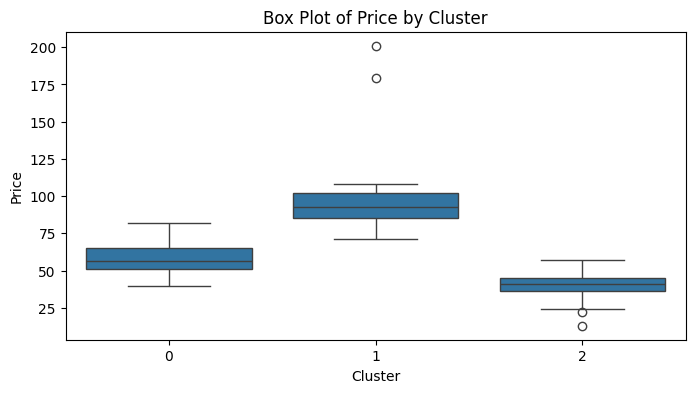

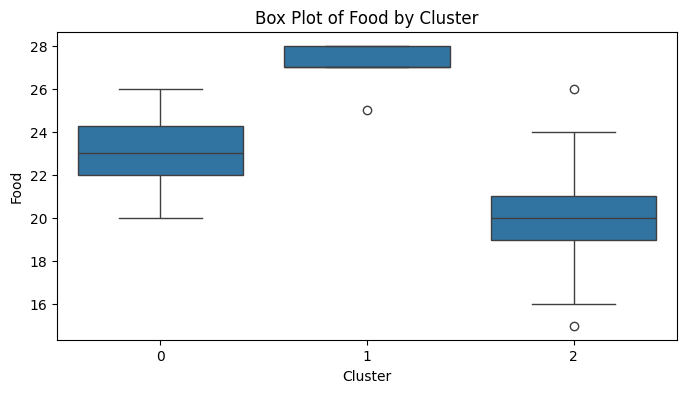

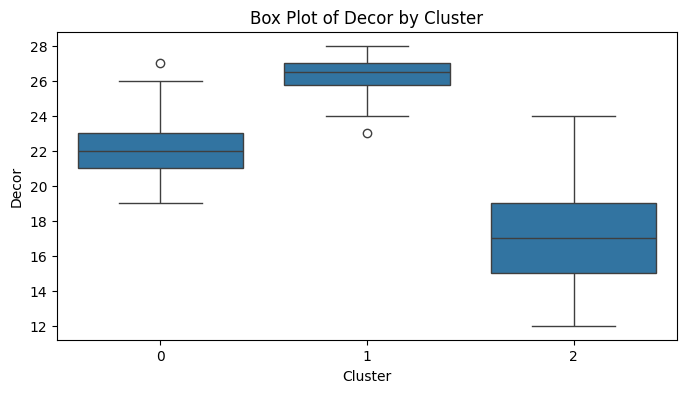

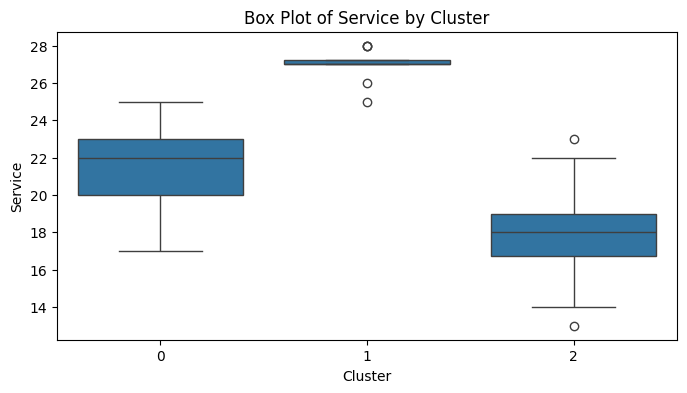


Cross-Tabulation Analysis (Michelin vs Cluster):
 Cluster      0   1   2
InMichelin            
0            9   2  79
1           39  10  25


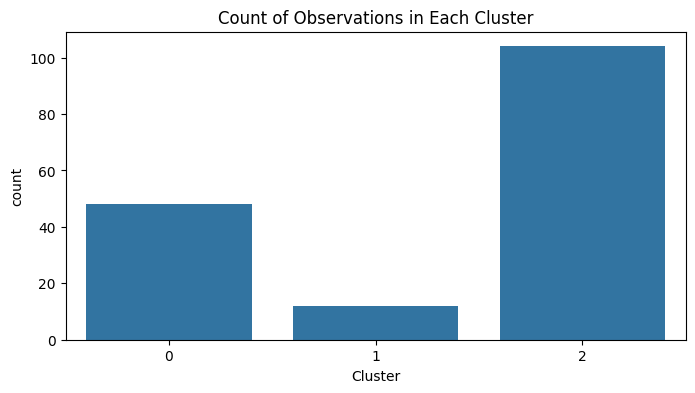

In [11]:
# Kmeans clustering on Michelin NY data
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
df = df.drop('Restaurant Name', axis=1) 
df.fillna(df.median(), inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Price', 'Food', 'Decor', 'Service']])
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = ['Price', 'Food', 'Decor', 'Service'] 
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)
michelin_percentage_by_cluster = df.groupby('Cluster')['InMichelin'].mean() * 100

plt.figure(figsize=(12,10))
colors = ['red', 'green', 'blue'] 
for cluster in range(optimal_k):
    # Plot each cluster
    cluster_data = finalDf[finalDf['cluster'] == cluster]
    plt.scatter(cluster_data['principal component 1'], cluster_data['principal component 2'], 
                color=colors[cluster], label=f'Cluster {cluster+1}', alpha=0.7)

    # Calculate and plot the centroid for each cluster
    centroid = cluster_data.mean()
    plt.scatter(centroid['principal component 1'], centroid['principal component 2'], 
                color=colors[cluster], marker='*', s=150, edgecolor='black')

    # Annotate the centroid with the Michelin percentage
    percentage = michelin_percentage_by_cluster[cluster]
    plt.text(centroid['principal component 1'], centroid['principal component 2'], 
             f'{percentage:.2f}%', color='black', ha='center', va='center', fontsize=10)
for i in range(loading_matrix.shape[0]):
    plt.arrow(0, 0, loading_matrix.PC1[i], loading_matrix.PC2[i], color='r', alpha=0.5)
    plt.text(loading_matrix.PC1[i]*1.1, loading_matrix.PC2[i]*1.1, loading_matrix.index[i], color='black', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of KMeans Clusters with Feature Arrows')
plt.legend()
plt.grid()
plt.show()

# Summary statistics for each cluster
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary Statistics:\n", cluster_summary)

# Box plots for each feature within each cluster
for feature in ['Price', 'Food', 'Decor', 'Service']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()

# Cross-tabulation analysis (Example with Michelin presence)
cross_tab = pd.crosstab(df['InMichelin'], df['Cluster'])
print("\nCross-Tabulation Analysis (Michelin vs Cluster):\n", cross_tab)

# Cluster count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Count of Observations in Each Cluster')
plt.show()



c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

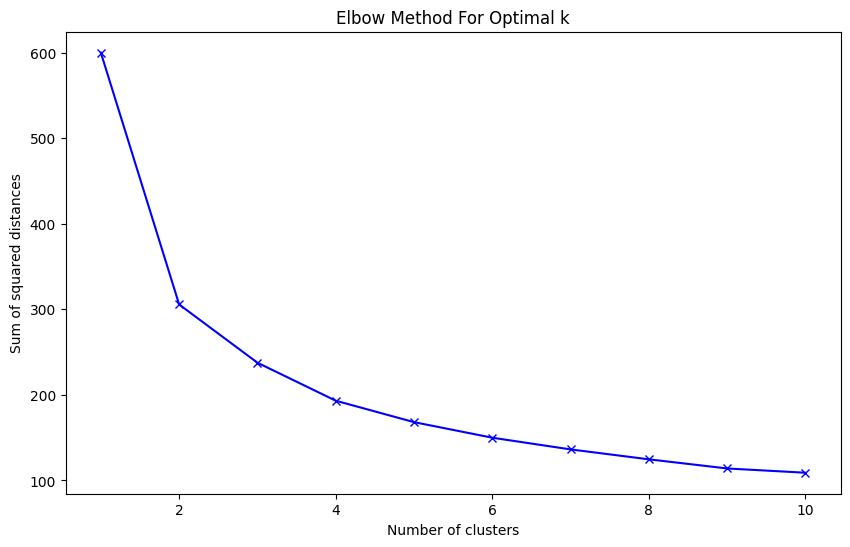

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Odhran\AppData\Local\Temp\ipykernel_9256\4078683246.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.labels_


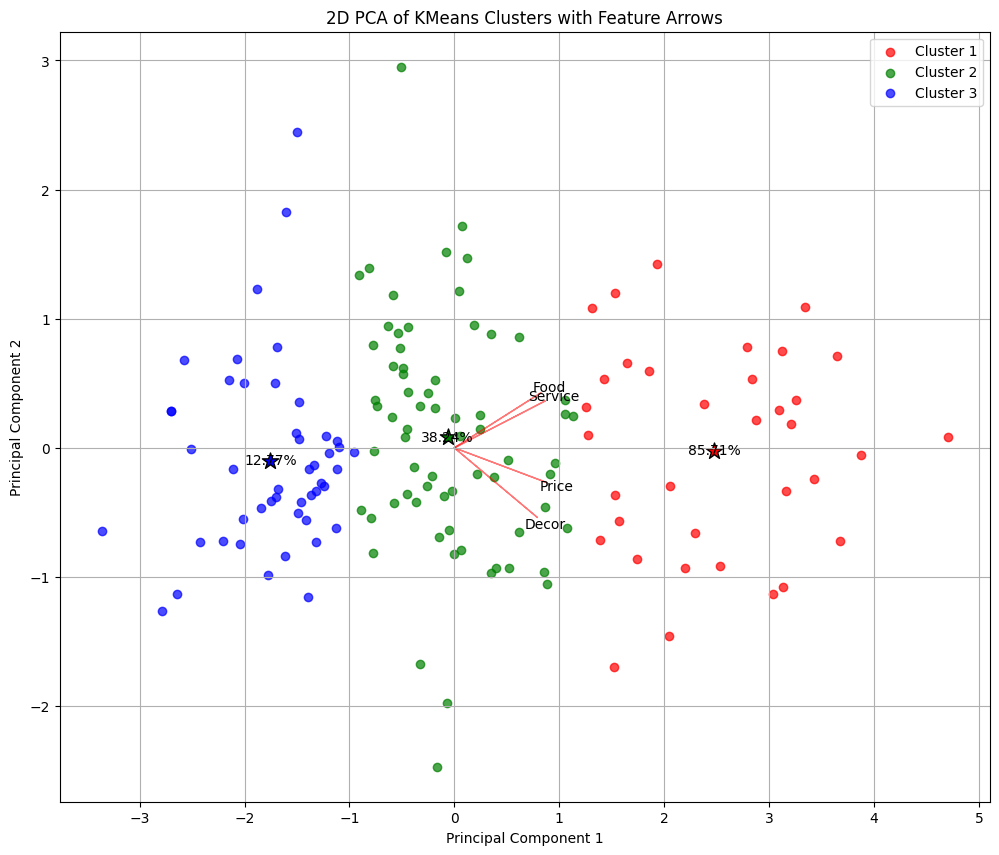

Cluster Summary Statistics:
          InMichelin       Food      Decor    Service      Price
Cluster                                                        
0          0.857143  23.542857  22.571429  22.371429  60.000000
1          0.382353  20.632353  18.485294  19.367647  44.294118
2          0.127660  18.765957  15.893617  16.468085  36.872340


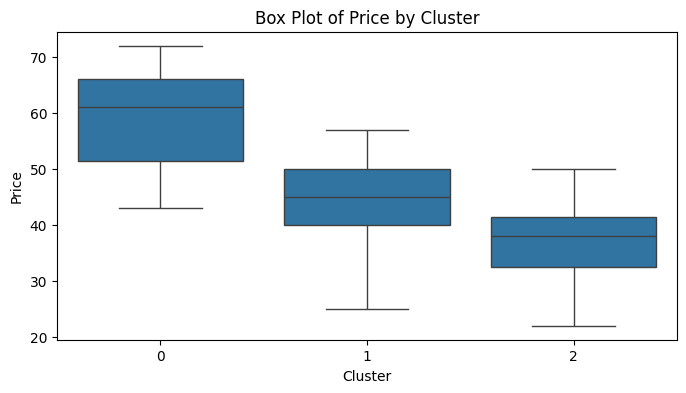

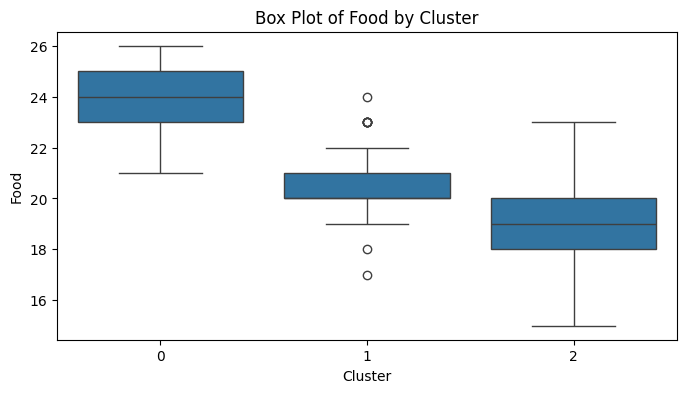

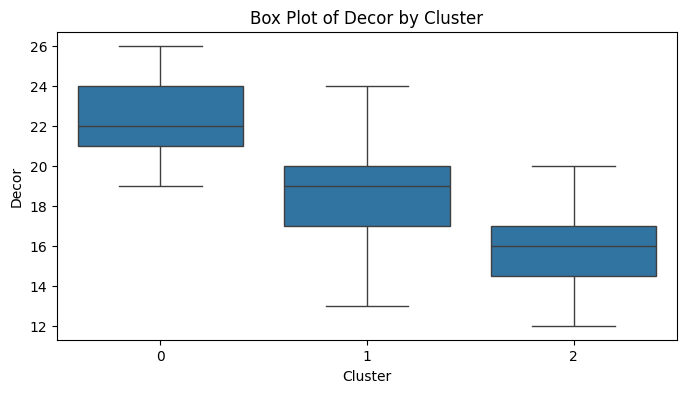

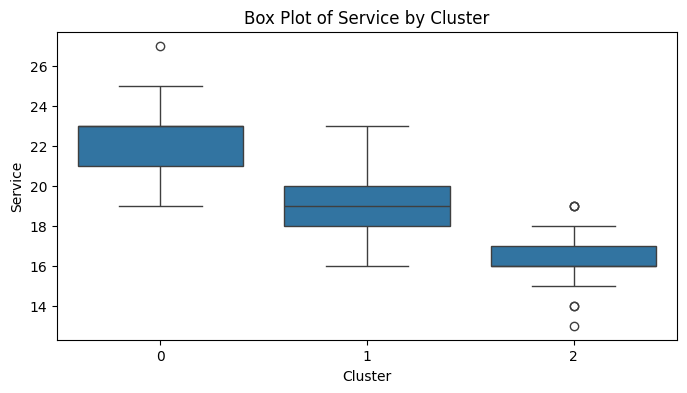


Cross-Tabulation Analysis (Michelin vs Cluster):
 Cluster      0   1   2
InMichelin            
0            5  42  41
1           30  26   6


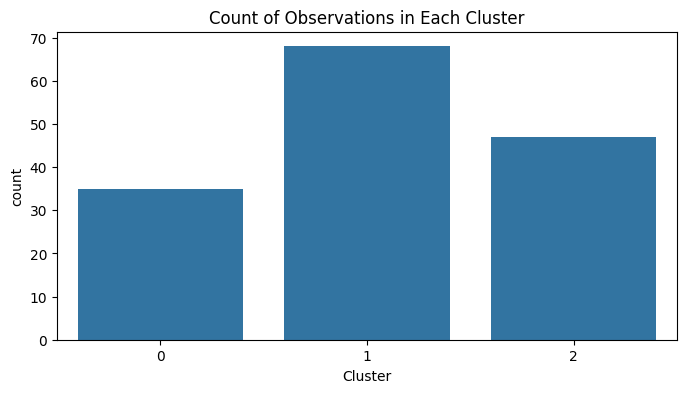

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
df = df.drop('Restaurant Name', axis=1)
df.fillna(df.median(), inplace=True)

# IQR method to find outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Proceed with scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(filtered_df[['Price', 'Food', 'Decor', 'Service']])

# Find the optimal number of clusters
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform KMeans clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=0)
kmeans.fit(df_scaled)

# Assign cluster labels to the filtered data
filtered_df['Cluster'] = kmeans.labels_

# PCA transformation
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Prepare the DataFrame for plotting
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = ['Price', 'Food', 'Decor', 'Service'] 
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)
michelin_percentage_by_cluster = filtered_df.groupby('Cluster')['InMichelin'].mean() * 100

plt.figure(figsize=(12,10))
colors = ['red', 'green', 'blue'] 
for cluster in range(optimal_k):
    # Plot each cluster
    cluster_data = finalDf[finalDf['cluster'] == cluster]
    plt.scatter(cluster_data['principal component 1'], cluster_data['principal component 2'], 
                color=colors[cluster], label=f'Cluster {cluster+1}', alpha=0.7)

    # Calculate and plot the centroid for each cluster
    centroid = cluster_data.mean()
    plt.scatter(centroid['principal component 1'], centroid['principal component 2'], 
                color=colors[cluster], marker='*', s=150, edgecolor='black')

    # Annotate the centroid with the Michelin percentage
    percentage = michelin_percentage_by_cluster[cluster]
    plt.text(centroid['principal component 1'], centroid['principal component 2'], 
             f'{percentage:.2f}%', color='black', ha='center', va='center', fontsize=10)
for i in range(loading_matrix.shape[0]):
    plt.arrow(0, 0, loading_matrix.PC1[i], loading_matrix.PC2[i], color='r', alpha=0.5)
    plt.text(loading_matrix.PC1[i]*1.1, loading_matrix.PC2[i]*1.1, loading_matrix.index[i], color='black', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of KMeans Clusters with Feature Arrows')
plt.legend()
plt.grid()
plt.show()

# Summary statistics for each cluster
cluster_summary = filtered_df.groupby('Cluster').mean()
print("Cluster Summary Statistics:\n", cluster_summary)

# Box plots for each feature within each cluster using the filtered DataFrame
for feature in ['Price', 'Food', 'Decor', 'Service']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=filtered_df)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()

# Cross-tabulation analysis using the filtered DataFrame
cross_tab = pd.crosstab(filtered_df['InMichelin'], filtered_df['Cluster'])
print("\nCross-Tabulation Analysis (Michelin vs Cluster):\n", cross_tab)

# Cluster count plot using the filtered DataFrame
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=filtered_df)
plt.title('Count of Observations in Each Cluster')
plt.show()



Descriptive Statistics for Cluster 1:
        InMichelin       Food      Decor    Service      Price  Cluster
count   68.000000  68.000000  68.000000  68.000000  68.000000     68.0
mean     0.382353  20.632353  18.485294  19.367647  44.294118      1.0
std      0.489575   1.280210   2.518544   1.505259   6.383418      0.0
min      0.000000  17.000000  13.000000  16.000000  25.000000      1.0
25%      0.000000  20.000000  17.000000  18.000000  40.000000      1.0
50%      0.000000  20.000000  19.000000  19.000000  45.000000      1.0
75%      1.000000  21.000000  20.000000  20.000000  50.000000      1.0
max      1.000000  24.000000  24.000000  23.000000  57.000000      1.0


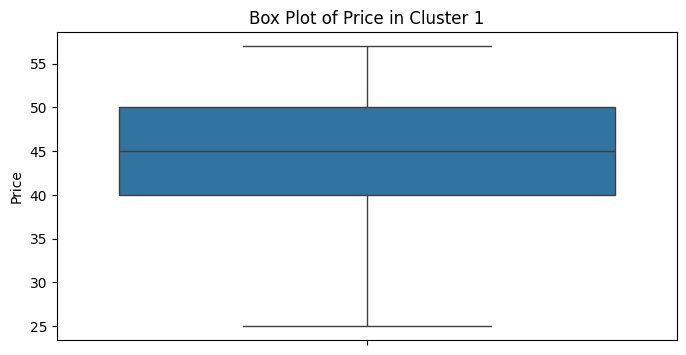

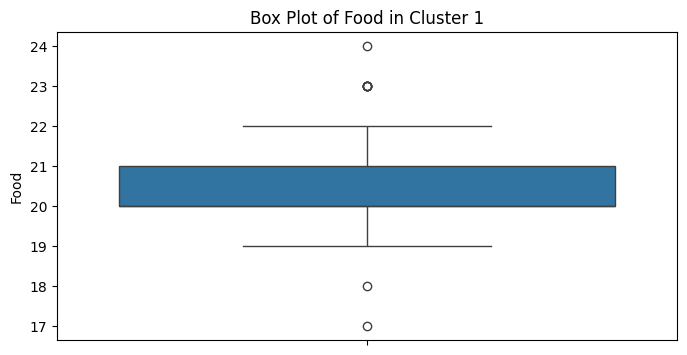

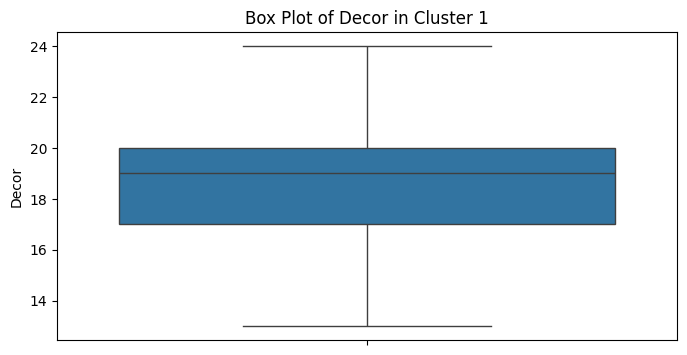

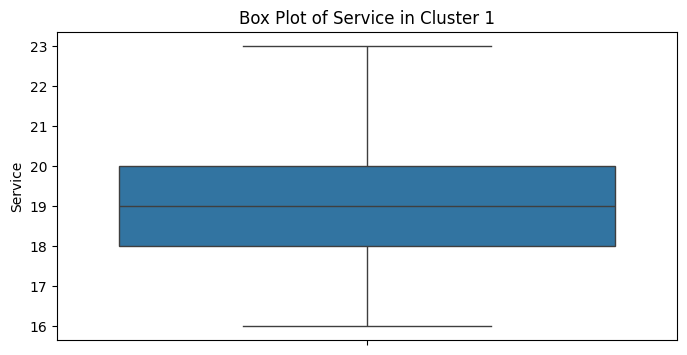

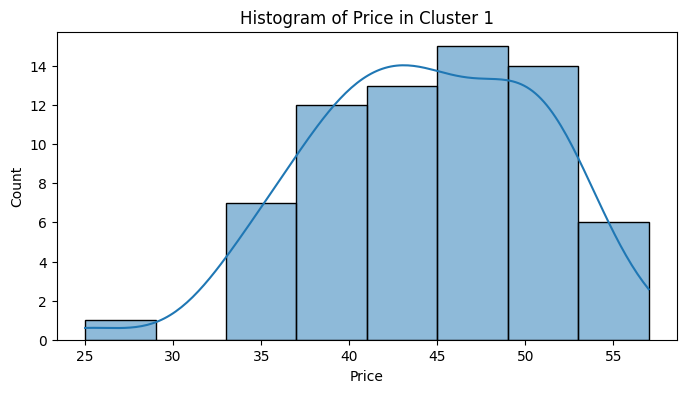

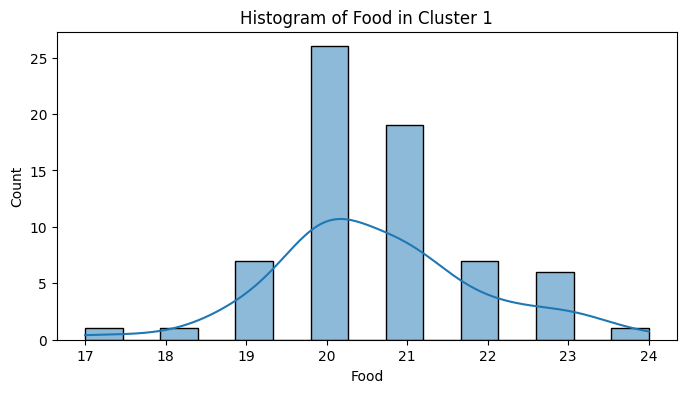

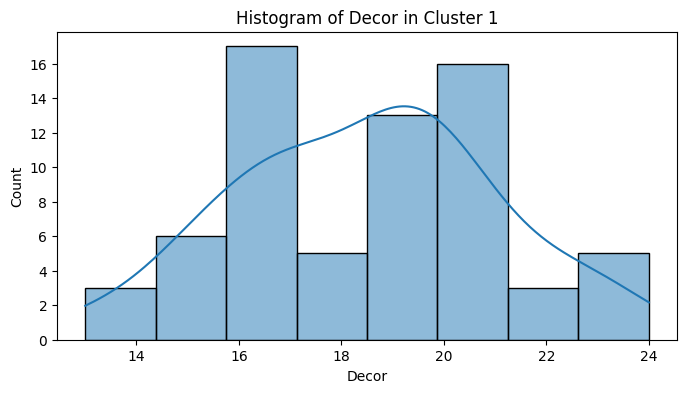

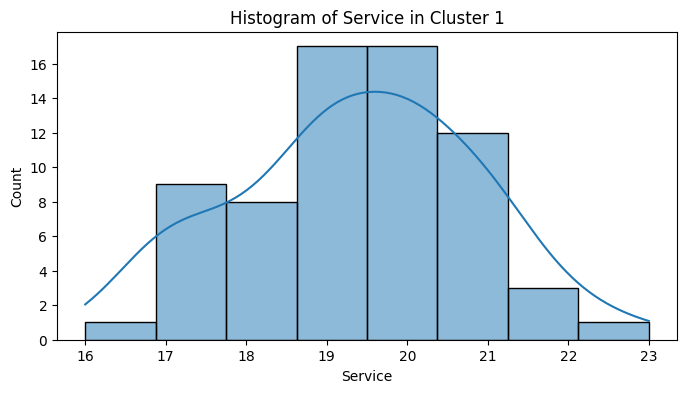

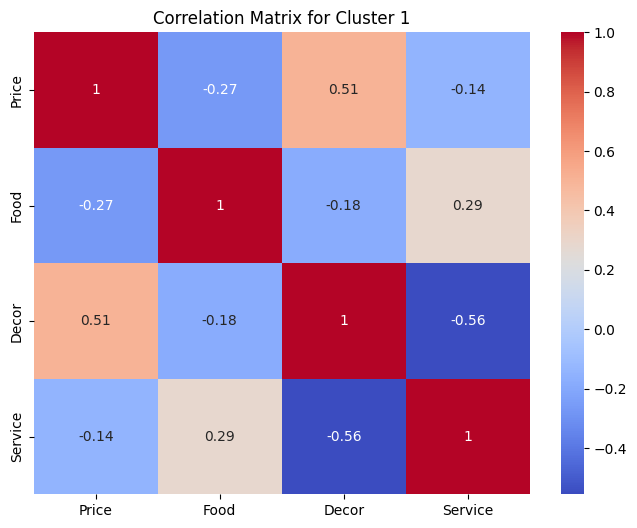

In [18]:
cluster_1_df = filtered_df[filtered_df['Cluster'] == 1]
print("Descriptive Statistics for Cluster 1:\n", cluster_1_df.describe())

# Box Plots for each feature in Cluster 1
for feature in ['Price', 'Food', 'Decor', 'Service']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=feature, data=cluster_1_df)
    plt.title(f'Box Plot of {feature} in Cluster 1')
    plt.show()

# Histograms for each feature in Cluster 1
for feature in ['Price', 'Food', 'Decor', 'Service']:
    plt.figure(figsize=(8, 4))
    sns.histplot(cluster_1_df[feature], kde=True)
    plt.title(f'Histogram of {feature} in Cluster 1')
    plt.show()

# Correlation Matrix for Cluster 1
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_1_df[['Price', 'Food', 'Decor', 'Service']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Cluster 1')
plt.show()


In [24]:
# Grid Searching through clustering algos
from sklearn.cluster import OPTICS, AffinityPropagation, Birch, KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Example data
df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
print(df.head())
df = df.drop('Restaurant Name', axis=1)
df.fillna(df.median(), inplace=True)
X = df.drop('InMichelin', axis=1)  
y = df['InMichelin']

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define clustering models and parameters
models = [
    (KMeans, {'n_clusters': range(2, 10)}),
    (DBSCAN, {'eps': np.arange(0.1, 1.0, 0.1), 'min_samples': range(2, 10)}),
    (GaussianMixture, {'n_components': range(2, 10)}),
    (SpectralClustering, {'n_clusters': range(2, 10)}),
    (AffinityPropagation, {'damping': np.arange(0.5, 1.0, 0.1)}),
    (MeanShift, {'bandwidth': np.arange(1, 5, 0.5)}),
    (OPTICS, {'min_samples': range(2, 10), 'xi': np.arange(0.05, 1.05, 0.05)}),
    (Birch, {'threshold': np.arange(0.1, 1.0, 0.1), 'branching_factor': range(20, 100, 10)})
]


best_score = 0
best_model = None
best_params = None

for model, params in models:
    print(f'Running {model.__name__}...')
    for param in ParameterGrid(params):
        clusterer = model(**param).fit(X_scaled)
        
        # Assign labels
        if hasattr(clusterer, 'labels_'):
            labels = clusterer.labels_
        else:
            labels = clusterer.predict(X_scaled)

        # Calculate Adjusted Rand Index
        score = adjusted_rand_score(y, labels)
        print(f'Parameters: {param}\tScore: {score}')
        if score > best_score:
            best_score = score
            best_model = model
            best_params = param

print(f'Best Model: {best_model}\nBest Parameters: {best_params}\nBest ARI Score: {best_score}')


   InMichelin Restaurant Name  Food  Decor  Service  Price
0           0  14 Wall Street    19     20       19     50
1           0             212    17     17       16     43
2           0        26 Seats    23     17       21     35
3           1              44    19     23       16     52
4           0               A    23     12       19     24
Running KMeans...
Parameters: {'n_clusters': 2}	Score: 0.28314367386726536
Parameters: {'n_clusters': 3}	Score: 0.2746269675231568
Parameters: {'n_clusters': 4}	Score: 0.17120829752382055
Parameters: {'n_clusters': 5}	Score: 0.16632009807804973


c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

Parameters: {'n_clusters': 6}	Score: 0.1542706208138905
Parameters: {'n_clusters': 7}	Score: 0.12105360645680359
Parameters: {'n_clusters': 8}	Score: 0.10474804662365648
Parameters: {'n_clusters': 9}	Score: 0.08633455519033485
Running DBSCAN...
Parameters: {'eps': 0.1, 'min_samples': 2}	Score: -0.012386631801642919
Parameters: {'eps': 0.1, 'min_samples': 3}	Score: 0.0
Parameters: {'eps': 0.1, 'min_samples': 4}	Score: 0.0
Parameters: {'eps': 0.1, 'min_samples': 5}	Score: 0.0
Parameters: {'eps': 0.1, 'min_samples': 6}	Score: 0.0
Parameters: {'eps': 0.1, 'min_samples': 7}	Score: 0.0
Parameters: {'eps': 0.1, 'min_samples': 8}	Score: 0.0
Parameters: {'eps': 0.1, 'min_samples': 9}	Score: 0.0
Parameters: {'eps': 0.2, 'min_samples': 2}	Score: -0.011990624457654626
Parameters: {'eps': 0.2, 'min_samples': 3}	Score: -0.005604865726417242
Parameters: {'eps': 0.2, 'min_samples': 4}	Score: 0.0
Parameters: {'eps': 0.2, 'min_samples': 5}	Score: 0.0
Parameters: {'eps': 0.2, 'min_samples': 6}	Score: 0.0

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Parameters: {'eps': 0.2, 'min_samples': 7}	Score: 0.0
Parameters: {'eps': 0.2, 'min_samples': 8}	Score: 0.0
Parameters: {'eps': 0.2, 'min_samples': 9}	Score: 0.0
Parameters: {'eps': 0.30000000000000004, 'min_samples': 2}	Score: -0.01000791662661104
Parameters: {'eps': 0.30000000000000004, 'min_samples': 3}	Score: -0.011026878015161957
Parameters: {'eps': 0.30000000000000004, 'min_samples': 4}	Score: -0.009550797375679456
Parameters: {'eps': 0.30000000000000004, 'min_samples': 5}	Score: 0.0
Parameters: {'eps': 0.30000000000000004, 'min_samples': 6}	Score: 0.0
Parameters: {'eps': 0.30000000000000004, 'min_samples': 7}	Score: 0.0
Parameters: {'eps': 0.30000000000000004, 'min_samples': 8}	Score: 0.0
Parameters: {'eps': 0.30000000000000004, 'min_samples': 9}	Score: 0.0
Parameters: {'eps': 0.4, 'min_samples': 2}	Score: 0.03554681824292392
Parameters: {'eps': 0.4, 'min_samples': 3}	Score: 0.030765007235048665
Parameters: {'eps': 0.4, 'min_samples': 4}	Score: 0.026397090880554818
Parameters: {

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Parameters: {'min_samples': 2, 'xi': 0.1}	Score: -0.001054973748992752
Parameters: {'min_samples': 2, 'xi': 0.15000000000000002}	Score: -0.004263168219906459
Parameters: {'min_samples': 2, 'xi': 0.2}	Score: -0.0012379066567247273


c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Parameters: {'min_samples': 2, 'xi': 0.25}	Score: -0.007708270253511337
Parameters: {'min_samples': 2, 'xi': 0.3}	Score: -0.008028160108636818


c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Parameters: {'min_samples': 2, 'xi': 0.35000000000000003}	Score: -0.008211461920608877
Parameters: {'min_samples': 2, 'xi': 0.4}	Score: -0.010056100024248017


c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Parameters: {'min_samples': 2, 'xi': 0.45}	Score: -0.008245372518700791
Parameters: {'min_samples': 2, 'xi': 0.5}	Score: -0.011239500334542322
Parameters: {'min_samples': 2, 'xi': 0.55}	Score: -0.009291582934430774


c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Parameters: {'min_samples': 2, 'xi': 0.6000000000000001}	Score: -0.006385525507620139
Parameters: {'min_samples': 2, 'xi': 0.6500000000000001}	Score: -0.006385525507620139
Parameters: {'min_samples': 2, 'xi': 0.7000000000000001}	Score: -0.010146832698235728


c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Parameters: {'min_samples': 2, 'xi': 0.7500000000000001}	Score: -0.0040361008092508815
Parameters: {'min_samples': 2, 'xi': 0.8}	Score: -0.0040361008092508815
Parameters: {'min_samples': 2, 'xi': 0.8500000000000001}	Score: -0.0040361008092508815


c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value enc

Parameters: {'min_samples': 2, 'xi': 0.9000000000000001}	Score: -0.0040361008092508815
Parameters: {'min_samples': 2, 'xi': 0.9500000000000001}	Score: -0.0040361008092508815
Parameters: {'min_samples': 2, 'xi': 1.0}	Score: -0.0040361008092508815
Parameters: {'min_samples': 3, 'xi': 0.05}	Score: 0.01797973527937099
Parameters: {'min_samples': 3, 'xi': 0.1}	Score: -0.004899166819282932
Parameters: {'min_samples': 3, 'xi': 0.15000000000000002}	Score: -0.0018620651565002643
Parameters: {'min_samples': 3, 'xi': 0.2}	Score: -0.0009093883916495507
Parameters: {'min_samples': 3, 'xi': 0.25}	Score: 0.008457485262606987
Parameters: {'min_samples': 3, 'xi': 0.3}	Score: 0.008457485262606987
Parameters: {'min_samples': 3, 'xi': 0.35000000000000003}	Score: 0.008457485262606987
Parameters: {'min_samples': 3, 'xi': 0.4}	Score: 0.016324405387095096
Parameters: {'min_samples': 3, 'xi': 0.45}	Score: 0.0
Parameters: {'min_samples': 3, 'xi': 0.5}	Score: 0.0
Parameters: {'min_samples': 3, 'xi': 0.55}	Score:

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value encountered in double_scalars
  sda for sda in sdas if mib <= reachability_plot[sda["start"]] * xi_complement


Parameters: {'min_samples': 3, 'xi': 1.0}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.05}	Score: 0.033418908866958356
Parameters: {'min_samples': 4, 'xi': 0.1}	Score: 0.04001643214229448
Parameters: {'min_samples': 4, 'xi': 0.15000000000000002}	Score: 0.06991869936939932
Parameters: {'min_samples': 4, 'xi': 0.2}	Score: 0.016324405387095096
Parameters: {'min_samples': 4, 'xi': 0.25}	Score: 0.016324405387095096
Parameters: {'min_samples': 4, 'xi': 0.3}	Score: 0.016324405387095096
Parameters: {'min_samples': 4, 'xi': 0.35000000000000003}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.4}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.45}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.5}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.55}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.6000000000000001}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.6500000000000001}	Score: 0.0
Parameters: {'min_samples': 4, 'xi': 0.7000000000000001}	Score: 0.0
Parameters: {'min_sample

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value encountered in double_scalars
  sda for sda in sdas if mib <= reachability_plot[sda["start"]] * xi_complement


Parameters: {'min_samples': 4, 'xi': 1.0}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.05}	Score: 0.03693194340037785
Parameters: {'min_samples': 5, 'xi': 0.1}	Score: 0.08649635761323682
Parameters: {'min_samples': 5, 'xi': 0.15000000000000002}	Score: 0.016324405387095096
Parameters: {'min_samples': 5, 'xi': 0.2}	Score: 0.016324405387095096
Parameters: {'min_samples': 5, 'xi': 0.25}	Score: 0.016324405387095096
Parameters: {'min_samples': 5, 'xi': 0.3}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.35000000000000003}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.4}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.45}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.5}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.55}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.6000000000000001}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.6500000000000001}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.7000000000000001}	Score: 0.0
Parameters: {'min_samples': 5, 'xi': 0.75

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value encountered in double_scalars
  sda for sda in sdas if mib <= reachability_plot[sda["start"]] * xi_complement


Parameters: {'min_samples': 5, 'xi': 1.0}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.05}	Score: 0.10235358662008431
Parameters: {'min_samples': 6, 'xi': 0.1}	Score: 0.016324405387095096
Parameters: {'min_samples': 6, 'xi': 0.15000000000000002}	Score: 0.016324405387095096
Parameters: {'min_samples': 6, 'xi': 0.2}	Score: 0.016324405387095096
Parameters: {'min_samples': 6, 'xi': 0.25}	Score: 0.016324405387095096
Parameters: {'min_samples': 6, 'xi': 0.3}	Score: 0.016324405387095096
Parameters: {'min_samples': 6, 'xi': 0.35000000000000003}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.4}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.45}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.5}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.55}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.6000000000000001}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.6500000000000001}	Score: 0.0
Parameters: {'min_samples': 6, 'xi': 0.7000000000000001}	Score: 0.0
Parameters: {'min_sampl

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value encountered in double_scalars
  sda for sda in sdas if mib <= reachability_plot[sda["start"]] * xi_complement


Parameters: {'min_samples': 6, 'xi': 1.0}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.05}	Score: 0.11528189583732351
Parameters: {'min_samples': 7, 'xi': 0.1}	Score: 0.029454739742370718
Parameters: {'min_samples': 7, 'xi': 0.15000000000000002}	Score: 0.029454739742370718
Parameters: {'min_samples': 7, 'xi': 0.2}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.25}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.3}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.35000000000000003}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.4}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.45}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.5}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.55}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.6000000000000001}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.6500000000000001}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.7000000000000001}	Score: 0.0
Parameters: {'min_samples': 7, 'xi': 0.7500000000000001}	Score: 0.0
Parame

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value encountered in double_scalars
  sda for sda in sdas if mib <= reachability_plot[sda["start"]] * xi_complement


Parameters: {'min_samples': 7, 'xi': 1.0}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.05}	Score: 0.11829706339050462
Parameters: {'min_samples': 8, 'xi': 0.1}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.15000000000000002}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.2}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.25}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.3}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.35000000000000003}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.4}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.45}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.5}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.55}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.6000000000000001}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.6500000000000001}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.7000000000000001}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.7500000000000001}	Score: 0.0
Parameters: {'min_samples': 8, 'xi': 0.8

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value encountered in double_scalars
  sda for sda in sdas if mib <= reachability_plot[sda["start"]] * xi_complement


Parameters: {'min_samples': 8, 'xi': 1.0}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.05}	Score: 0.022325182280992135
Parameters: {'min_samples': 9, 'xi': 0.1}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.15000000000000002}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.2}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.25}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.3}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.35000000000000003}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.4}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.45}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.5}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.55}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.6000000000000001}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.6500000000000001}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.7000000000000001}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.7500000000000001}	Score: 0.0
Parameters: {'min_samples': 9, 'xi': 0.

c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:997: RuntimeWarning: divide by zero encountered in double_scalars
  steep_downward = ratio >= 1 / xi_complement
c:\Users\Odhran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: invalid value encountered in double_scalars
  sda for sda in sdas if mib <= reachability_plot[sda["start"]] * xi_complement


Parameters: {'min_samples': 9, 'xi': 1.0}	Score: 0.0
Running Birch...
Parameters: {'branching_factor': 20, 'threshold': 0.1}	Score: 0.313658464601108
Parameters: {'branching_factor': 20, 'threshold': 0.2}	Score: 0.25724352932569156
Parameters: {'branching_factor': 20, 'threshold': 0.30000000000000004}	Score: 0.27309609723205036
Parameters: {'branching_factor': 20, 'threshold': 0.4}	Score: 0.17931290287188628
Parameters: {'branching_factor': 20, 'threshold': 0.5}	Score: 0.32713493378833014
Parameters: {'branching_factor': 20, 'threshold': 0.6}	Score: 0.13034897057552702
Parameters: {'branching_factor': 20, 'threshold': 0.7000000000000001}	Score: 0.12137016090209057
Parameters: {'branching_factor': 20, 'threshold': 0.8}	Score: 0.27318296682347615
Parameters: {'branching_factor': 20, 'threshold': 0.9}	Score: 0.31320005803750073
Parameters: {'branching_factor': 30, 'threshold': 0.1}	Score: 0.313658464601108
Parameters: {'branching_factor': 30, 'threshold': 0.2}	Score: 0.1688650576004774
Pa

C:\Users\Odhran\AppData\Local\Temp\ipykernel_9256\3064531960.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = birch.labels_


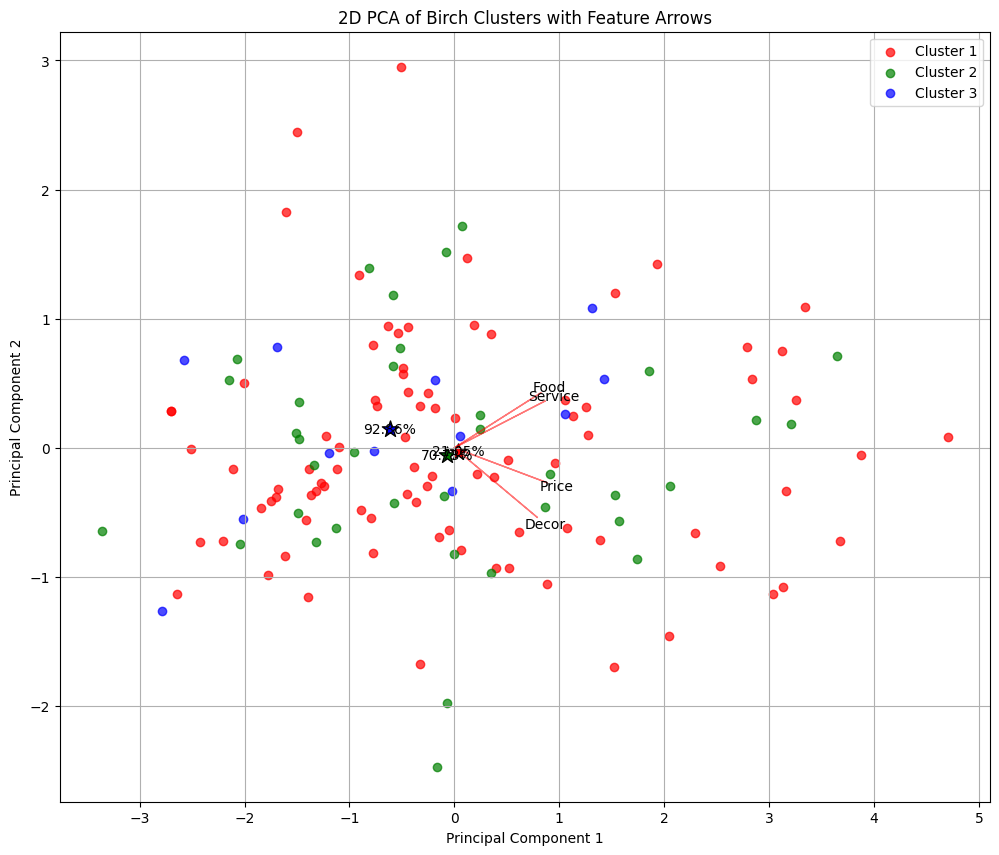

Cluster Summary Statistics:
          InMichelin       Food      Decor    Service      Price
Cluster                                                        
0          0.210526  19.715789  16.652632  18.031579  39.189474
1          0.707317  21.682927  21.829268  20.219512  53.195122
2          0.928571  24.785714  22.642857  23.714286  67.214286


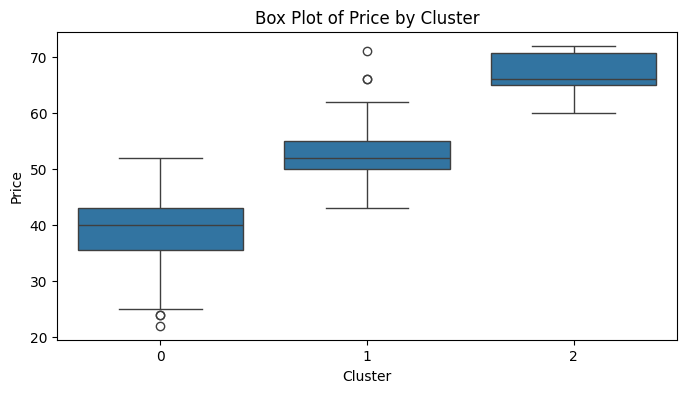

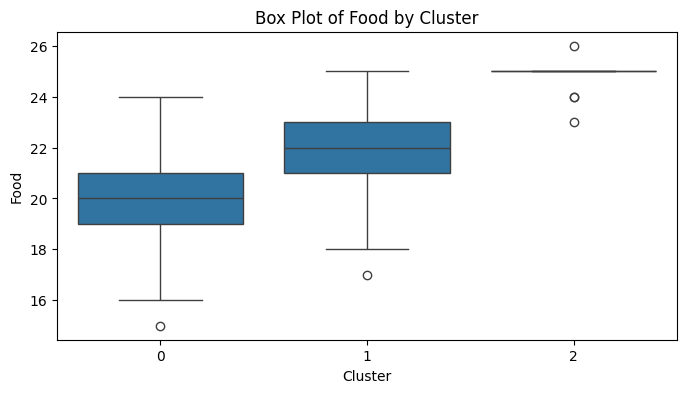

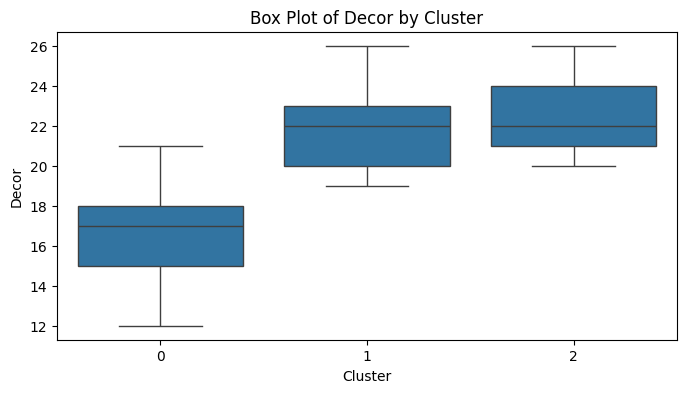

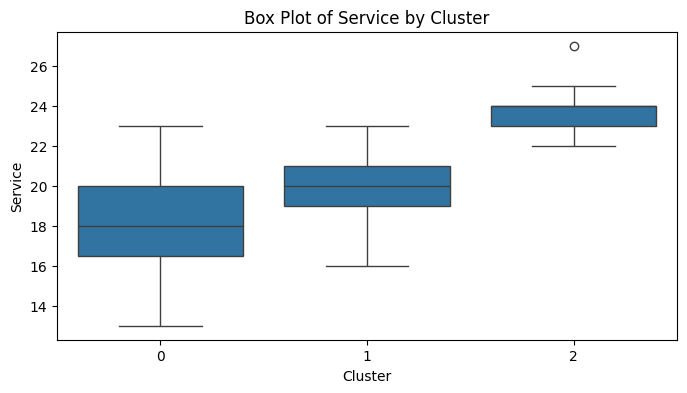


Cross-Tabulation Analysis (Michelin vs Cluster):
 Cluster      0   1   2
InMichelin            
0           75  12   1
1           20  29  13


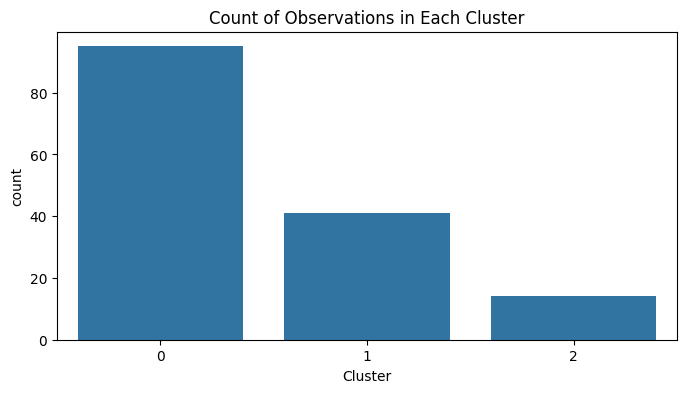

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
df = df.drop('Restaurant Name', axis=1)
df.fillna(df.median(), inplace=True)

# Filter out the outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(filtered_df[['Price', 'Food', 'Decor', 'Service']])

# Birch clustering
birch = Birch(branching_factor=30, threshold=0.5)
birch.fit(df_scaled)
filtered_df['Cluster'] = birch.labels_

# PCA for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principalComponents, 
                           columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, filtered_df['Cluster']], axis=1)

# Compute PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = ['Price', 'Food', 'Decor', 'Service']
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)

# Michelin percentage by cluster
michelin_percentage_by_cluster = filtered_df.groupby('Cluster')['InMichelin'].mean() * 100

# Plot the clusters with PCA
plt.figure(figsize=(12,10))
colors = ['red', 'green', 'blue']
for cluster in range(3):
    cluster_data = finalDf[finalDf['Cluster'] == cluster]
    plt.scatter(cluster_data['principal component 1'], cluster_data['principal component 2'], 
                color=colors[cluster], label=f'Cluster {cluster+1}', alpha=0.7)

    # Calculate and plot centroid
    centroid = cluster_data.mean()
    plt.scatter(centroid['principal component 1'], centroid['principal component 2'], 
                color=colors[cluster], marker='*', s=150, edgecolor='black')

    # Annotate centroid with Michelin percentage
    percentage = michelin_percentage_by_cluster[cluster]
    plt.text(centroid['principal component 1'], centroid['principal component 2'], 
             f'{percentage:.2f}%', color='black', ha='center', va='center', fontsize=10)

# Feature arrows
for i in range(loading_matrix.shape[0]):
    plt.arrow(0, 0, loading_matrix.PC1[i], loading_matrix.PC2[i], color='r', alpha=0.5)
    plt.text(loading_matrix.PC1[i]*1.1, loading_matrix.PC2[i]*1.1, loading_matrix.index[i], color='black', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Birch Clusters with Feature Arrows')
plt.legend()
plt.grid()
plt.show()

# Print summary statistics for each cluster
print("Cluster Summary Statistics:\n", filtered_df.groupby('Cluster').mean())

# Box plots for each feature within each cluster
for feature in ['Price', 'Food', 'Decor', 'Service']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=filtered_df)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()

# Cross-tabulation analysis
cross_tab = pd.crosstab(filtered_df['InMichelin'], filtered_df['Cluster'])
print("\nCross-Tabulation Analysis (Michelin vs Cluster):\n", cross_tab)

# Cluster count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=filtered_df)
plt.title('Count of Observations in Each Cluster')
plt.show()


<Figure size 1200x1000 with 0 Axes>

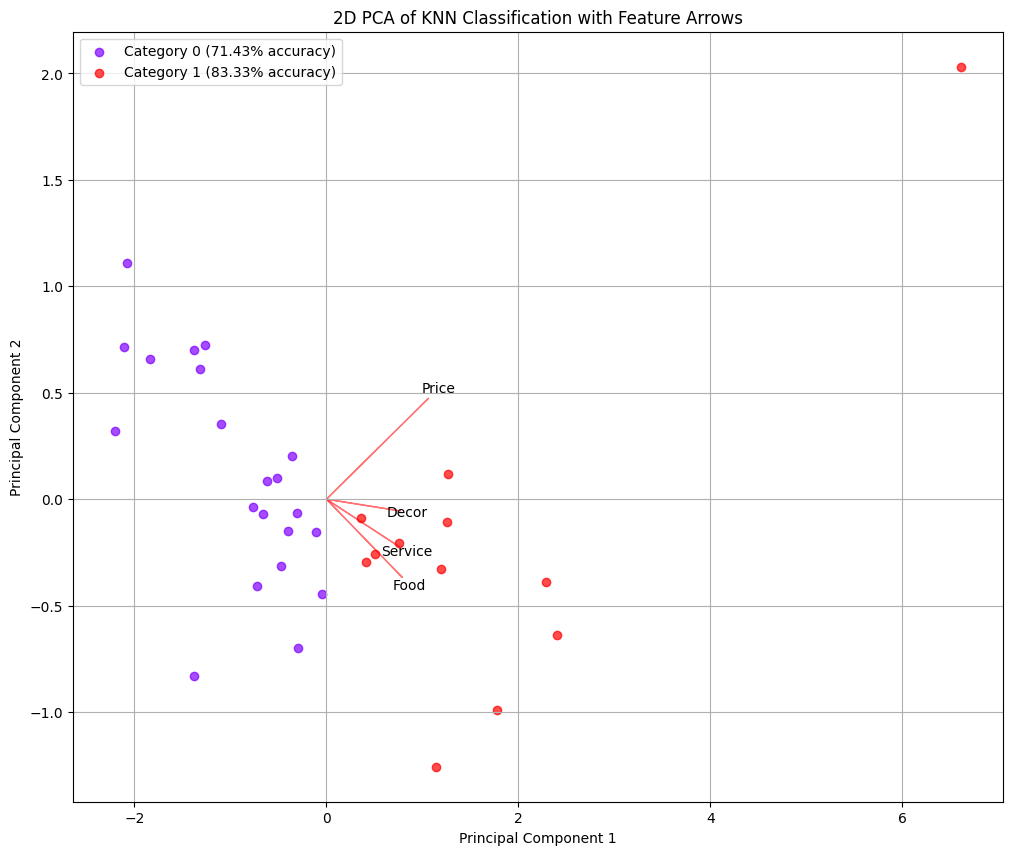

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess the data
df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
df = df.drop('Restaurant Name', axis=1) 
df.fillna(df.median(), inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Price', 'Food', 'Decor', 'Service']])
target = 'InMichelin'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df[target], test_size=0.2, random_state=0)

# KNN
knn = KNeighborsClassifier(n_neighbors=19, metric='euclidean', weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
test_principalDf = pd.DataFrame(data=X_test_pca, columns=['principal component 1', 'principal component 2'])
test_finalDf = pd.concat([test_principalDf, pd.DataFrame({'predicted_category': y_pred})], axis=1)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = ['Price', 'Food', 'Decor', 'Service']  # Features used for PCA
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)

plt.figure(figsize=(12,10))
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(y_pred))))
accuracies = {}
for cat in np.unique(y_pred):
    cat_indices = np.where(y_pred == cat)[0]
    cat_true = y_test.iloc[cat_indices]
    cat_pred = y_pred[cat_indices]
    accuracies[cat] = accuracy_score(cat_true, cat_pred) * 100

# Plotting the results of classification with accuracies
plt.figure(figsize=(12,10))
for cat, color in zip(np.unique(y_pred), colors):
    cat_data = test_finalDf[test_finalDf['predicted_category'] == cat]
    plt.scatter(cat_data['principal component 1'], cat_data['principal component 2'], 
                color=color, label=f'Category {cat} ({accuracies[cat]:.2f}% accuracy)', alpha=0.7)

for i in range(loading_matrix.shape[0]):
    plt.arrow(0, 0, loading_matrix.PC1[i], loading_matrix.PC2[i], color='r', alpha=0.5)
    plt.text(loading_matrix.PC1[i]*1.1, loading_matrix.PC2[i]*1.1, loading_matrix.index[i], color='black', ha='center', va='center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of KNN Classification with Feature Arrows')
plt.legend()
plt.grid()
plt.show()


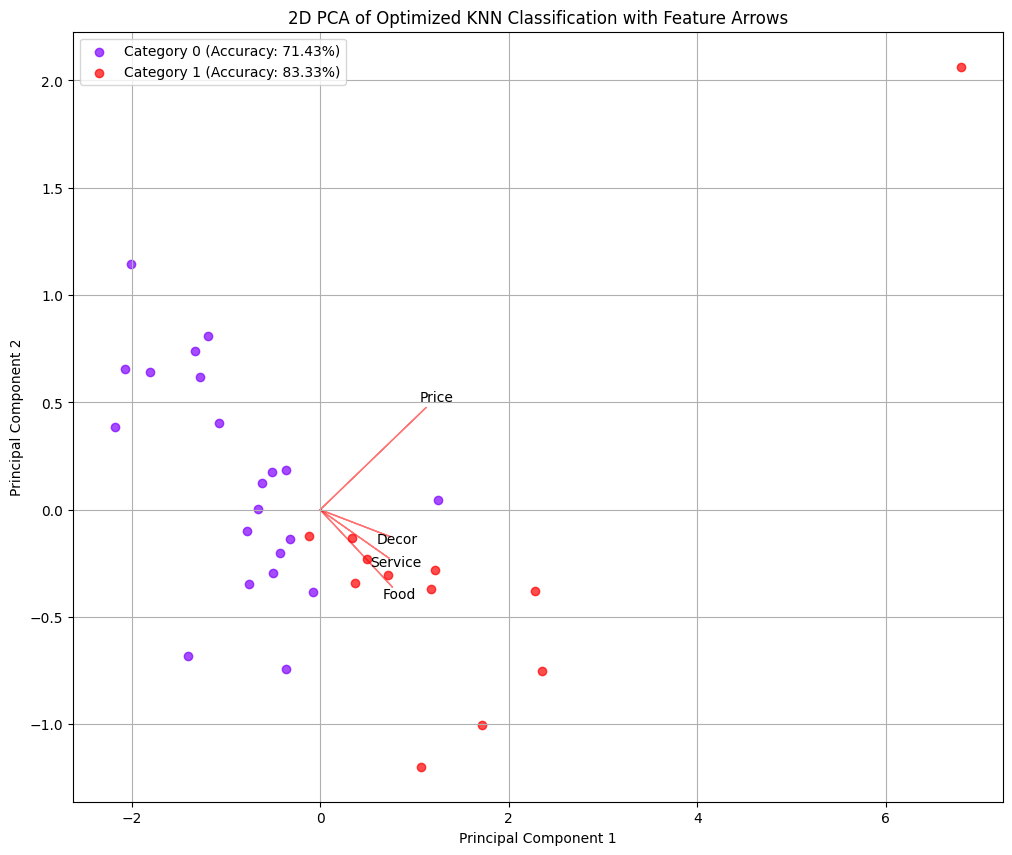

Accuracy for fold 1: 0.79
Accuracy for fold 2: 0.85
Accuracy for fold 3: 0.79
Accuracy for fold 4: 0.73
Accuracy for fold 5: 0.78
Mean cross-validated accuracy: 0.79


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Load data
df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
df = df.drop('Restaurant Name', axis=1)
df.fillna(df.median(), inplace=True)

# Prepare data for KNN
X = df[['Price', 'Food', 'Decor', 'Service']]
y = df['InMichelin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best KNN model from GridSearchCV
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

# PCA transformation
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
test_principalDf = pd.DataFrame(data=X_test_pca, columns=['principal component 1', 'principal component 2'])
test_finalDf = pd.concat([test_principalDf, pd.DataFrame({'predicted_category': y_pred})], axis=1)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = ['Price', 'Food', 'Decor', 'Service']
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)

# Plotting the results of classification
plt.figure(figsize=(12,10))
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(y_pred))))
accuracies = {}
for cat in np.unique(y_pred):
    cat_data = test_finalDf[test_finalDf['predicted_category'] == cat]
    plt.scatter(cat_data['principal component 1'], cat_data['principal component 2'], 
                color=colors[cat], label=f'Category {cat} (Accuracy: {accuracy_score(y_test[y_pred == cat], y_pred[y_pred == cat]) * 100:.2f}%)', alpha=0.7)

for i in range(loading_matrix.shape[0]):
    plt.arrow(0, 0, loading_matrix.PC1[i], loading_matrix.PC2[i], color='r', alpha=0.5)
    plt.text(loading_matrix.PC1[i]*1.1, loading_matrix.PC2[i]*1.1, loading_matrix.index[i], color='black', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Optimized KNN Classification with Feature Arrows')
plt.legend()
plt.grid()
plt.show()
X = df[['Price', 'Food', 'Decor', 'Service']]
y = df['InMichelin']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)

# Print the accuracy for each fold
for i, score in enumerate(cv_scores, 1):
    print(f"Accuracy for fold {i}: {score:.2f}")

# Print the mean accuracy across all 5 folds
mean_accuracy = np.mean(cv_scores)
print(f"Mean cross-validated accuracy: {mean_accuracy:.2f}")

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
df = df.drop('Restaurant Name', axis=1)
df.fillna(df.median(), inplace=True)

# Prepare data for KNN
X = df[['Price', 'Food', 'Decor', 'Service']]
y = df['InMichelin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of hyperparameters for tuning
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
}

# Create a KNN model
knn = KNeighborsClassifier()

# Grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

# Evaluate on the test set with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Best score: 0.815954415954416
Test accuracy: 0.7575757575757576


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam

# Load data
df = pd.read_csv('../data/MichelinNY.csv', encoding='ISO-8859-1')
df = df.drop('Restaurant Name', axis=1)
df.fillna(df.median(), inplace=True)

# Prepare data for neural network
X = df[['Price', 'Food', 'Decor', 'Service']]
y = df['InMichelin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=256, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='keras_tuner_demo')

# Splitting the training data for validation
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=0)

tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best hyperparameters: {best_hps.values}')

model = tuner.hypermodel.build(best_hps)
model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {accuracy:.2f}')


Reloading Tuner from my_dir\keras_tuner_demo\tuner0.json
Best hyperparameters: {'units_1': 320, 'dropout': 0.1, 'units_2': 224, 'learning_rate': 0.001}
Epoch 1/50
4/4 [==============================] - 1s 65ms/step - loss: 0.6453 - accuracy: 0.6538 - val_loss: 0.6245 - val_accuracy: 0.7037
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.5028 - accuracy: 0.8077 - val_loss: 0.6037 - val_accuracy: 0.7037
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 0.4529 - accuracy: 0.8173 - val_loss: 0.6034 - val_accuracy: 0.7037
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 0.4308 - accuracy: 0.8077 - val_loss: 0.6023 - val_accuracy: 0.7037
Epoch 5/50
4/4 [==============================] - 0s 24ms/step - loss: 0.4197 - accuracy: 0.8077 - val_loss: 0.5985 - val_accuracy: 0.7037
Epoch 6/50
4/4 [==============================] - 0s 29ms/step - loss: 0.4126 - accuracy: 0.8173 - val_loss: 0.5896 - val_accuracy: 0.7037
Epoch 7/50
4/4